## How could your date of birth affect your life

On December 1st, 1969, the first Vietnam draft lottery was held to determine who would be drafted to fight in the Vietnam War. Every man in the country born between 1944 through 1950 was assigned a lottery number based on their date of birth. People with a lower number were called first. Anyone with a lottery number from 1 to 195 was eventually called to serve.

Shortly after the draft, there was a controversy because the lottery numbers weren’t completely random. The days of the year (including February 29) were written on slips of paper. These pieces of paper were then placed in separate plastic capsules that were mixed in a shoebox and then dumped into a deep glass jar. Capsules were drawn from the jar one at a time. Because of the way they were mixed in the shoebox, there was a bias in the lottery meant that people with birthdays later in the year were more likely to have low draft numbers.



This project has 5 parts:

    - Data cleaning
    
    - Data visualization
    
    - Linear regression:  Is there a correlation or not between the month and the lottery number?
    
    - Montecarlo simulation: How improbable was the outcome of the 1969 lottery?
    
    - Did the government fix the problem for the draft lotteries in 1970, 71, and 72?

# DATA CLEANING

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from numpy import random

plt.rcParams['figure.figsize'] = (14,8)

In [2]:
df = pd.read_csv('Vietnam_Draft_Lottery_Data.csv')
df

,M,D,N69,N70,N71,N72
0,1,1,305,133,207,150
1,1,2,159,195,225,328
2,1,3,251,336,246,42
3,1,4,215,99,264,28
4,1,5,101,33,265,338
...,...,...,...,...,...,...
361,12,27,78,239,290,194
362,12,28,123,128,174,156
363,12,29,16,145,101,175
364,12,30,3,192,167,281


For the moment, we just need data from 1969

In [3]:
draft_69 = df.drop(['N70', 'N71', 'N72'], axis = 1)
draft_69 = draft_69.rename(columns={'M': 'Month', 'D': 'Day', 'N69': 'Lottery number'})
draft_69['Day of year'] = draft_69.index + 1
draft_69["Month name"] = draft_69["Month"]
draft_69

,Month,Day,Lottery number,Day of year,Month name
0,1,1,305,1,1
1,1,2,159,2,1
2,1,3,251,3,1
3,1,4,215,4,1
4,1,5,101,5,1
...,...,...,...,...,...
361,12,27,78,362,12
362,12,28,123,363,12
363,12,29,16,364,12
364,12,30,3,365,12


In [4]:
draft_69.dtypes

Month             int64
Day               int64
Lottery number    int64
Day of year       int64
Month name        int64
dtype: object

We want to have the name of the months instead of the number

In [5]:
draft_69["Month name"] = draft_69["Month name"].apply(str)
draft_69["Month name"].replace({"1":"January", "2":"February", "3":"March", "4":"April", "5":"May", "6":"June", "7":"July", "8":"August", "9":"September", "10":"October", "11":"November", "12":"December"},inplace=True)
draft_69

,Month,Day,Lottery number,Day of year,Month name
0,1,1,305,1,January
1,1,2,159,2,January
2,1,3,251,3,January
3,1,4,215,4,January
4,1,5,101,5,January
...,...,...,...,...,...
361,12,27,78,362,December
362,12,28,123,363,December
363,12,29,16,364,December
364,12,30,3,365,December


All the numbers below 195 were recruited

In [6]:
draft_69["Recluted"] = np.where(draft_69["Lottery number"] < 195, True, False)
draft_69.groupby("Month")["Recluted"].value_counts()

Month  Recluted
1      False       17
       True        14
2      False       16
       True        13
3      False       21
       True        10
4      False       18
       True        12
5      False       17
       True        14
6      False       16
       True        14
7      True        18
       False       13
8      True        19
       False       12
9      True        18
       False       12
10     False       17
       True        14
11     True        22
       False        8
12     True        26
       False        5
Name: Recluted, dtype: int64

We have all the data cleaned

# DATA VISUALIZATION

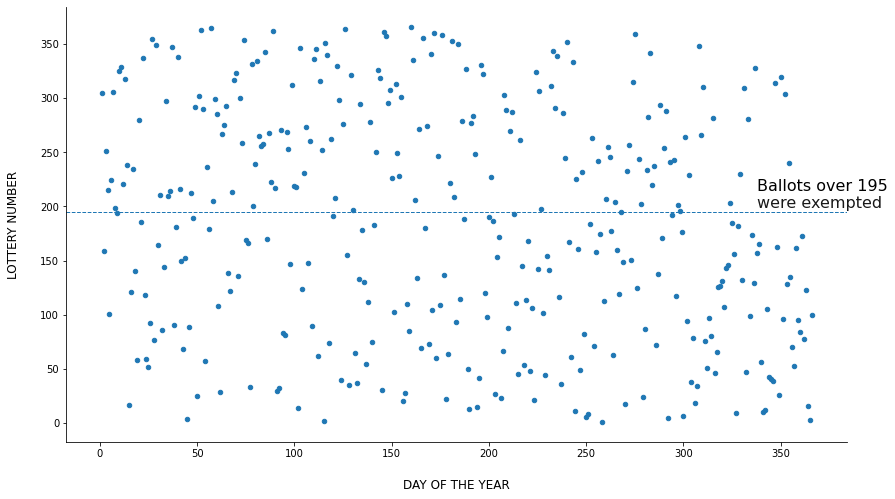

In [7]:
b = draft_69.plot.scatter(x='Day of year', y='Lottery number')
b.set_xlabel("DAY OF THE YEAR", labelpad=20, size=12)
b.set_ylabel("LOTTERY NUMBER", labelpad=20, size=12)
b.spines['right'].set_visible(False)   #remove border
b.spines['top'].set_visible(False)
b.axhline(195, linewidth=1, linestyle = "--")
b.text(338, 215, "Ballots over 195", size = 16, alpha =1)
b.text(338, 199, "were exempted", size = 16, alpha =0.9)

plt.savefig('00_first_plot.jpg', dpi=200)

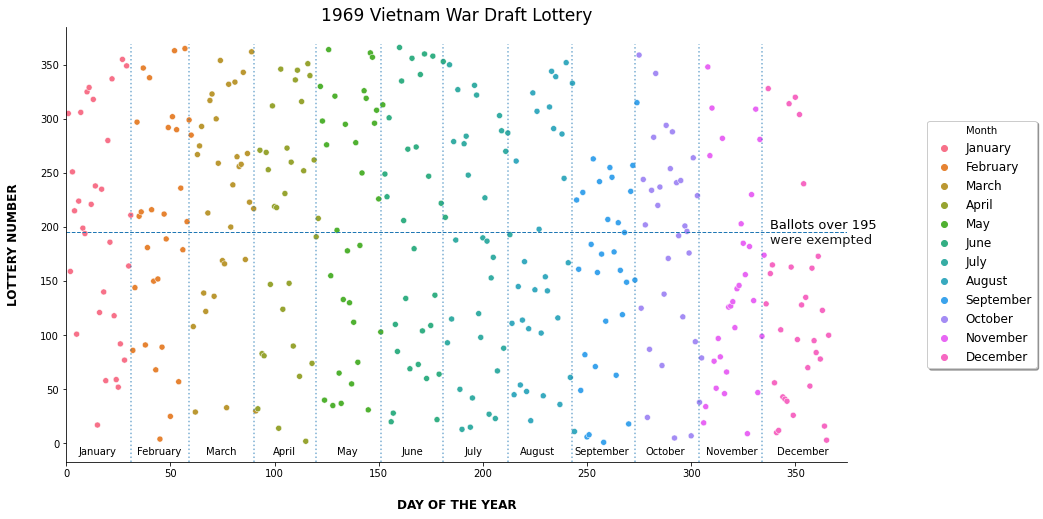

In [8]:
#plt.figure(figsize=(20,10))
g = sns.scatterplot(x='Day of year', y='Lottery number', hue='Month name', data= draft_69, legend=True)

g.legend(title="Month",
         loc='right', 
         bbox_to_anchor=(1.25, 0.5), 
         ncol=1, 
         fontsize = 12,
         shadow = True)


plt.title("1969 Vietnam War Draft Lottery", size=17)

g.set(xlim = (0, 375))
g.set(ylim = (-17, 385))

g.set_xlabel("DAY OF THE YEAR", labelpad=20, weight='bold', size=12)
g.set_ylabel("LOTTERY NUMBER", labelpad=20, weight='bold', size=12)

plt.axvline(31, alpha =0.6,ymax = 0.96, linestyle = ":")
plt.axvline(59, alpha =0.6,ymax = 0.96, linestyle = ":")
plt.axvline(90, alpha =0.6,ymax = 0.96, linestyle = ":")
plt.axvline(120, alpha =0.6,ymax = 0.96, linestyle = ":")
plt.axvline(151, alpha =0.6,ymax = 0.96, linestyle = ":")
plt.axvline(181, alpha =0.6,ymax = 0.96, linestyle = ":")
plt.axvline(212, alpha =0.6,ymax = 0.96, linestyle = ":")
plt.axvline(243, alpha =0.6,ymax = 0.96, linestyle = ":")
plt.axvline(273, alpha =0.6,ymax = 0.96, linestyle = ":")
plt.axvline(304, alpha =0.6,ymax = 0.96, linestyle = ":")
plt.axvline(334, alpha =0.6,ymax = 0.96, linestyle = ":")

g.axhline(195, linewidth=1, linestyle = "--")
g.text(338, 198, "Ballots over 195", size = 13, alpha =1)
g.text(338, 185, "were exempted", size = 13, alpha =0.9)


g.text(6,-10, "January")
g.text(34,-10, "February")
g.text(67,-10, "March")
g.text(99,-10, "April")
g.text(130,-10, "May")
g.text(161,-10, "June")
g.text(191,-10, "July")
g.text(218,-10, "August")
g.text(244,-10, "September")
g.text(278,-10, "October")
g.text(307,-10, "November")
g.text(341,-10, "December")


g.spines['right'].set_visible(False)   #remove border
g.spines['top'].set_visible(False)

plt.savefig('01_draft_plot.jpg', dpi=200)


### Let's take a closer look at the difference between months with some plots

First, we create a new dataframe grouping the days by months

In [9]:
months_69 = draft_69.groupby('Month')[['Lottery number']].mean().round(2)
months_69 = months_69.rename(columns={'Lottery number': 'Average lottery number'})
months_69["Month_name"] = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
months_69["Number of selected days"] = [14,13,10,12,14,14,18,19,19,14,22,26]
months_69["Mo"] = [1,2,3,4,5,6,7,8,9,10,11,12]
months_69

,Average lottery number,Month_name,Number of selected days,Mo
Month,,,,
1,201.16,January,14,1
2,202.97,February,13,2
3,225.81,March,10,3
4,203.67,April,12,4
5,207.97,May,14,5
6,195.73,June,14,6
7,181.55,July,18,7
8,173.45,August,19,8
9,157.30,September,19,9


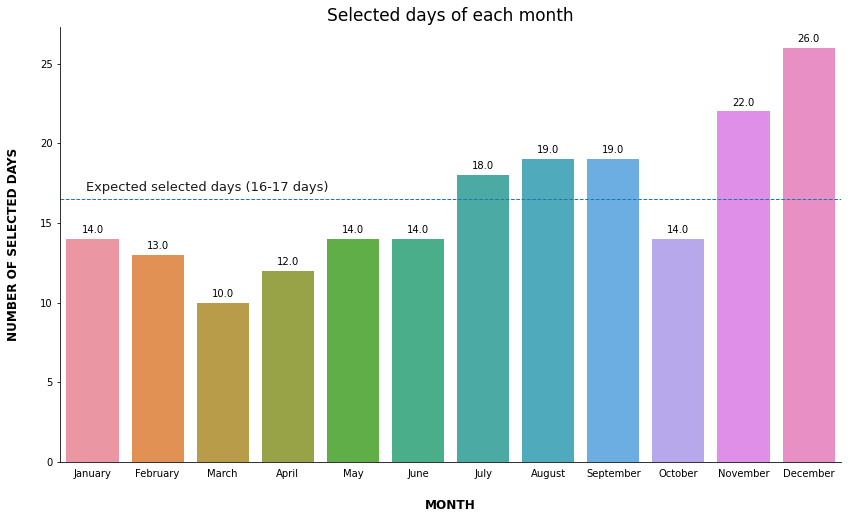

In [10]:
ax4 = sns.barplot(data = months_69, x='Month_name', y='Number of selected days')  #palette="Set2"
ax4.axhline(16.5, linewidth=1, label = "number of expected days", linestyle = "--")
ax4.text(-0.1, 17, "Expected selected days (16-17 days)", size = 13, alpha =0.9)
ax4.set_xlabel("MONTH", labelpad=20, weight='bold', size=12)
ax4.set_ylabel("NUMBER OF SELECTED DAYS", labelpad=20, weight='bold', size=12)

plt.title("Selected days of each month", size=17)

ax4.spines['right'].set_visible(False)   #remove border
ax4.spines['top'].set_visible(False)
ax4.tick_params(left=True, bottom=False) 

for p in ax4.patches:
    ax4.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.savefig('02_selected_days.jpg',dpi=200)


In [11]:
#draft_69_ballot['Mo'] = draft_69_ballot.index
months_69.dtypes

Average lottery number     float64
Month_name                  object
Number of selected days      int64
Mo                           int64
dtype: object

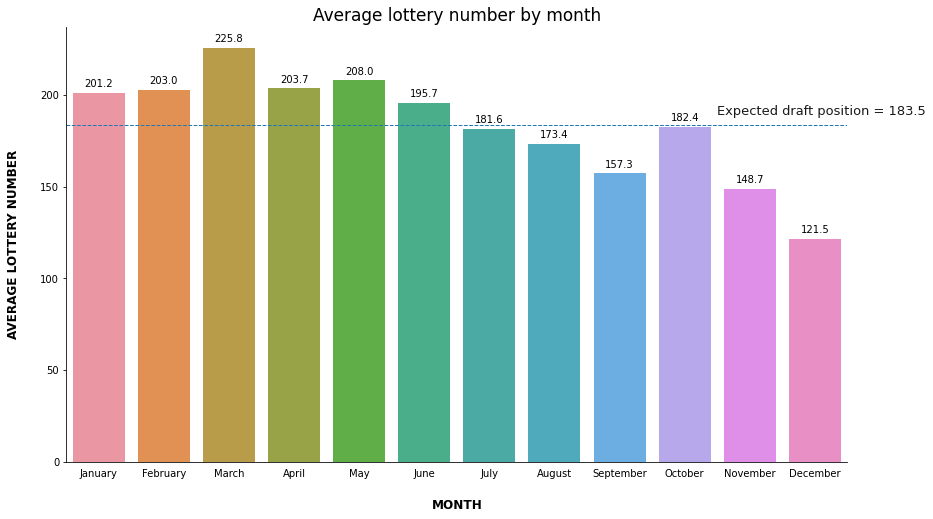

In [12]:
ax5 = sns.barplot(data = months_69, x = "Month_name", y = "Average lottery number")
ax5.axhline(183.5, linewidth=1, label = "number of expected days", linestyle = "--")
ax5.text(9.5, 189, "Expected draft position = 183.5", size = 13, alpha =0.9)
ax5.set_xlabel("MONTH", labelpad=20, weight='bold', size=12)
ax5.set_ylabel("AVERAGE LOTTERY NUMBER", labelpad=20, weight='bold', size=12)

ax5.spines['right'].set_visible(False)   #remove border
ax5.spines['top'].set_visible(False)

ax5.tick_params(left=True, bottom=False)   #remove mark ticks

plt.title("Average lottery number by month", size=17)


for p in ax5.patches:
    ax5.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
plt.savefig('03_average_lottery_number.jpg', dpi=200)
    


### Now let's look at the deviation, calculating the deviations of the average number of the ballot vs. what is expected

In [13]:
draft_69.head()

,Month,Day,Lottery number,Day of year,Month name,Recluted
0,1,1,305,1,January,False
1,1,2,159,2,January,True
2,1,3,251,3,January,False
3,1,4,215,4,January,False
4,1,5,101,5,January,True


If we add up all the lottery numbers and divide them by the number of tickets, we will obtain the expected average number

In [14]:
draft_69["Lottery number"].sum()/366

183.5

In [15]:
months_69['deviation'] = months_69['Average lottery number'] - 183.5
months_69["abs_dev"] = abs(months_69["deviation"])
total_abs_dev = months_69["abs_dev"].sum()
print("Total deviation in 1969 was " + str(total_abs_dev.round(2)))

Total deviation in 1969 was 272.28


In [16]:
months_69.head()

,Average lottery number,Month_name,Number of selected days,Mo,deviation,abs_dev
Month,,,,,,
1,201.16,January,14,1,17.66,17.66
2,202.97,February,13,2,19.47,19.47
3,225.81,March,10,3,42.31,42.31
4,203.67,April,12,4,20.17,20.17
5,207.97,May,14,5,24.47,24.47


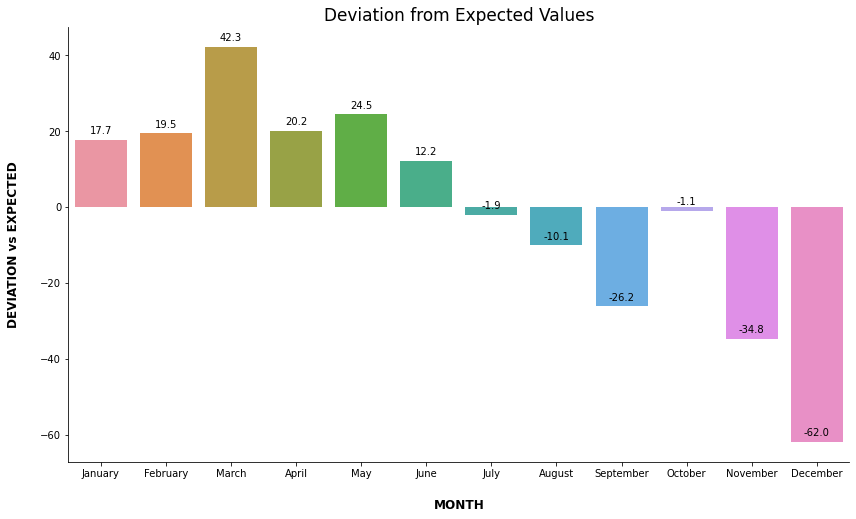

In [17]:
ax6 = sns.barplot(data = months_69, x = "Month_name", y = "deviation")

plt.title("Deviation from Expected Values", size=17)


ax6.set_xlabel("MONTH", labelpad=20, weight='bold', size=12)
ax6.set_ylabel("DEVIATION vs EXPECTED", labelpad=20, weight='bold', size=12)

ax6.spines['right'].set_visible(False)   #remove border
ax6.spines['top'].set_visible(False)


for p in ax6.patches:
    ax6.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
plt.savefig('04_deviation_from_expected.jpg',dpi=200)

# LINEAR REGRESSION

### Let's make a linear regression between the average lottery number of each month and the months of the year. Is there a correlation or not between the month and the lottery number?

In [18]:
# Creamos el objeto de Regresión Linear
model = linear_model.LinearRegression()
y = months_69['Average lottery number']
X = months_69[['Mo']]

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [20]:
X_train.shape, X_test.shape

((9, 1), (3, 1))

In [21]:
y.shape, X.shape    

((12,), (12, 1))

In [22]:
# We train our model
model.fit(X_train, y_train) 

LinearRegression()

In [23]:
#We make the predictions, which is basically a line.
y_pred = model.predict(X_test)
y_pred.shape
y_pred.round(2)

array([140.75, 150.13, 234.53])

In [24]:
print("Coefficient:", model.coef_.round(2))      
print("Intercept   :", model.intercept_.round(2))

print("Train score (R2) :", model.score(X_train, y_train).round(2))   #Return the coefficient of determination of the prediction
#R2 = is the model good or not?

print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Coefficient: [-9.38]
Intercept   : 243.91
Train score (R2) : 0.88
Mean squared error: 740.68


In [25]:
months_69["Average lottery number"].corr(months_69["Mo"]).round(2)  #STRONG NEGATIVE CORRELATION ( PEARSON METHOD BY DEFAULT)

-0.87

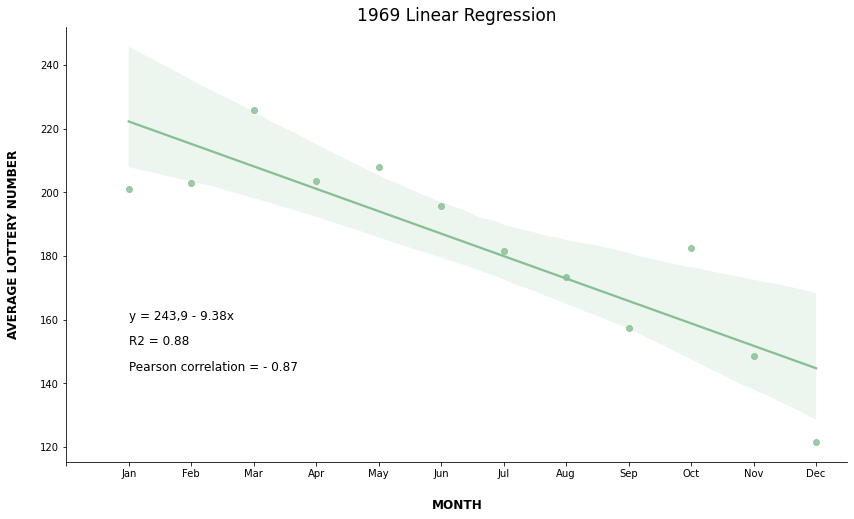

In [26]:
hh = sns.regplot(x="Mo", y="Average lottery number", data=months_69, color='#86bf91')
plt.xlim(1,12.5)
plt.xlabel("Month")
#plt.xticks(np.arange(min("Mo"), max("Mo"), 1.0))

plt.title("1969 Linear Regression", size=17)
hh.set_xticks(range(13))
hh.set_xticklabels(['','Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])


hh.set_xlabel("MONTH", labelpad=20, weight='bold', size=12)
hh.set_ylabel("AVERAGE LOTTERY NUMBER", labelpad=20, weight='bold', size=12)

hh.spines['right'].set_visible(False)   #remove border
hh.spines['top'].set_visible(False)


hh.text(1, 160, "y = 243,9 - 9.38x", size = 12)
hh.text(1, 152, "R2 = 0.88", size = 12)
hh.text(1, 144, "Pearson correlation = - 0.87", size = 12)


plt.savefig('05_linear_regression.jpg',dpi=200)



#### Conclusion: 
- Correlation is not causation, but this correlation does not prove a cause but it does reveal a pattern, an absence of the uniformity by months that is presupposed to a fair draw
- The distribution... was not "random".
- The slope is significantly different from zero

In [27]:
#Another way to see the linear regression with our predictions
#plt.scatter(X_test, y_test)
#plt.plot(X_test, y_pred, color='red', linewidth=3)
#plt.title('Regresión Lineal Simple')

# MONTECARLO SIMULATION 

## How improbable was the outcome of the 1969 lottery?

- To check this, I generated 10000 drafts: 10000 different random ways of mixing the lottery box.

- Of all those ways we had to make the lottery, in how many of them would the result have been the same or more unbalanced?

- How unlikely was the outcome if it had been "random"? 

For each simulated draft

1. Calculate the average number of lottery in each month
2. Measure the deviation from the expected (183.5) 
3. Add these deviations

In [28]:
deviations=[]
for x in range(10000):
    lottery = list(range(1,367))   
    random.shuffle(lottery)
    draft_69["Lottery_number"] = np.array(lottery)
    draft_69_lottery = draft_69.groupby('Month')[['Lottery_number']].mean() 
    draft_69_lottery['deviation'] = draft_69_lottery['Lottery_number'] - 183.5
    draft_69_lottery["abs_dev"] = abs(draft_69_lottery["deviation"])          
    total_abs_dev = draft_69_lottery["abs_dev"].sum().round(2)
    deviations.append(total_abs_dev)

In [29]:
deviations.sort()

### HOW TO PLOT BOTH PLOTS

In [30]:
dff = pd.DataFrame(deviations,columns=['Absolute deviations'])
dff.tail(15)    

,Absolute deviations
9985,305.84
9986,307.28
9987,307.46
9988,310.96
9989,312.37
9990,312.50
9991,312.69
9992,313.36
9993,317.07
9994,317.08


In [31]:
dff.quantile(0.95)

Absolute deviations    243.74
Name: 0.95, dtype: float64

Among all the lotteries, how many of them have a deviation equal to the one that resulted in 1969 (272.28)?

In [32]:
sum(dff["Absolute deviations"] >= 272.28)        #only 137 of 10000!!  1,29%

120

In [33]:
dff["Absolute deviations"].mean()

175.62045300000085

##### Only 135 of 10000! This is an 1,29%

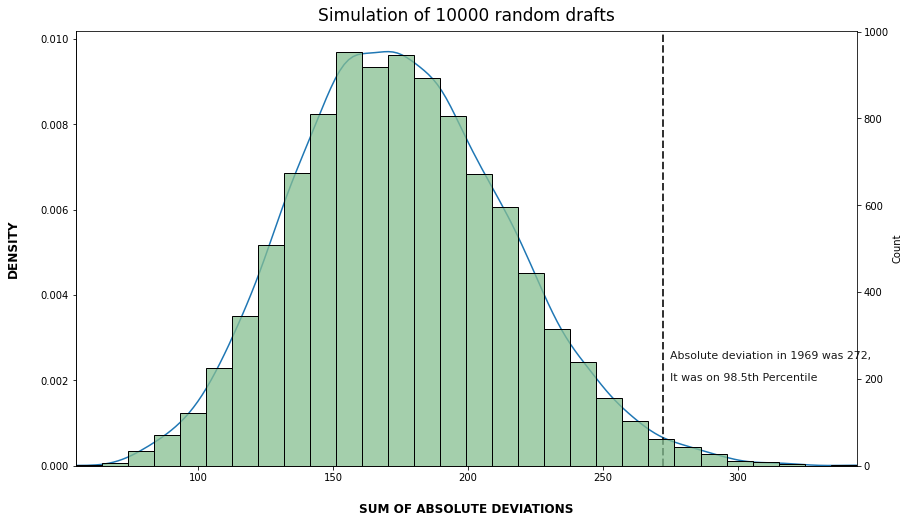

In [34]:
fig, ax1 = plt.subplots()
sns.kdeplot(data=dff, x="Absolute deviations", ax=ax1)
ax1.set_xlim((dff["Absolute deviations"].min(), dff["Absolute deviations"].max()))


ax2 = ax1.twinx()
ax2.set_title("Simulation of 10000 random drafts", size = 17, pad = 10)
sns.histplot(data=dff, x="Absolute deviations", ax=ax2, color='#86bf91', bins = 30)
#ax1.axvline(250.05, linewidth=2, alpha =0.8, linestyle = ":") #95%
ax1.axvline(272.28, linewidth=2, alpha =0.8, linestyle = "--", color="k")
ax1.text(275, 0.002, "It was on 98.5th Percentile", size = 11, alpha =0.9)
ax1.text(275, 0.0025, "Absolute deviation in 1969 was 272,", size = 11, alpha =0.9)


ax1.set_xlabel("SUM OF ABSOLUTE DEVIATIONS", labelpad=20, weight='bold', size=12)
ax1.set_ylabel("DENSITY", labelpad=20, weight='bold', size=12)
ax1.spines['right'].set_visible(False)   #remove border
ax1.spines['top'].set_visible(False)


/home/dani/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


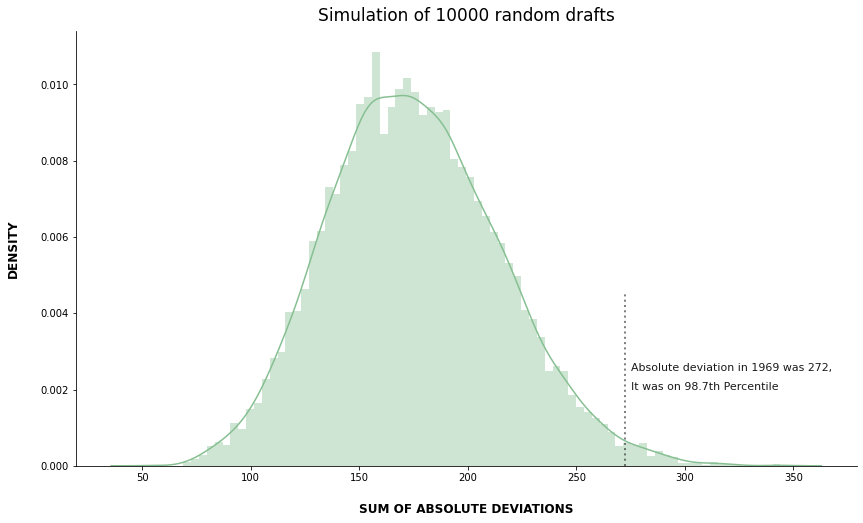

In [35]:
ax3 = sns.distplot(dff, bins=80, color='#86bf91')

ax3.set_title("Simulation of 10000 random drafts", size = 17, pad = 10)

ax3.axvline(272.28, linewidth=2, alpha =0.5, ymax = 0.4, linestyle = ":", color="k")
ax3.text(275, 0.002, "It was on 98.7th Percentile", size = 11, alpha =0.9)
ax3.text(275, 0.0025, "Absolute deviation in 1969 was 272,", size = 11, alpha =0.9)
ax3.set_xlabel("SUM OF ABSOLUTE DEVIATIONS", labelpad=20, weight='bold', size=12)
ax3.set_ylabel("DENSITY", labelpad=20, weight='bold', size=12)
ax3.spines['right'].set_visible(False)   #remove border
ax3.spines['top'].set_visible(False)

plt.savefig('06_random_simulation.jpg',dpi=200)



Of the 10,000 possible ways to carry out the draw, in 98.7% of them, the draw would have been "fairer".

In other words: the probability of obtaining a result farther from the expected (uniform) was only 1,3%.

We can immediately see that very few records fall into the red “Exceeded Actual Deviation” group. In addition, the shape of the histogram almost perfectly models a bell curve, which is to be expected thanks to the central limit theorem.

In [36]:
# Calculate percentiles
quant_5, quant_25, quant_50, quant_75, quant_95 = dff.quantile(0.05), dff.quantile(0.25), dff.quantile(0.5), dff.quantile(0.75), dff.quantile(0.95)
# [quantile, opacity, length]
quants = [[quant_5, 0.6, 0.16], [quant_25, 0.8, 0.26], [quant_50, 1, 0.36],  [quant_75, 0.8, 0.46], [quant_95, 0.6, 0.56]]
quant_50

Absolute deviations    173.615
Name: 0.5, dtype: float64

In [37]:
dff.quantile(0.98425192)
#272.2676677790137
dff.quantile(0.98656)

Absolute deviations    269.718989
Name: 0.98656, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7fdbcfaa4400>,
 'caps': [<matplotlib.lines.Line2D at 0x7fdbcfaa4b20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fdbcfaa4070>],
 'medians': [<matplotlib.lines.Line2D at 0x7fdbcfaaf280>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fdbcfaaf610>],
 'means': []}

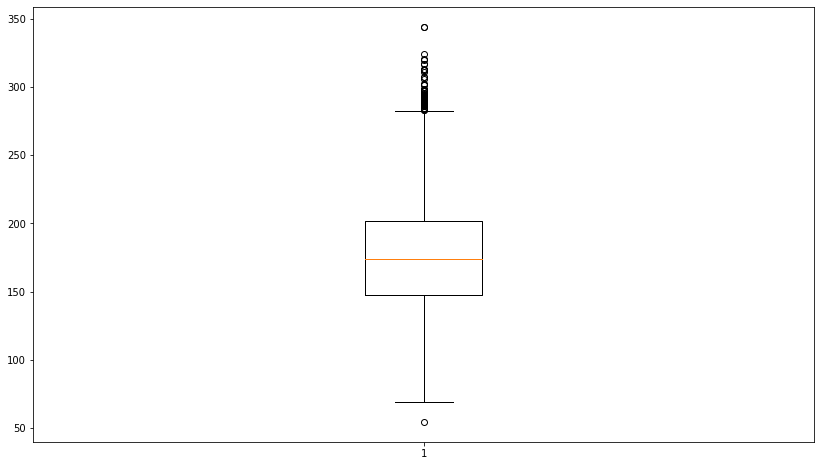

In [38]:
plt.boxplot(dff)

### RAINCLOUD

In [39]:
import ptitprince as pt
dff

,Absolute deviations
0,54.49
1,69.38
2,71.51
3,72.32
4,72.45
...,...
9995,319.41
9996,320.47
9997,323.75
9998,343.59


/home/dani/anaconda3/lib/python3.8/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/home/dani/anaconda3/lib/python3.8/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/home/dani/anaconda3/lib/python3.8/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


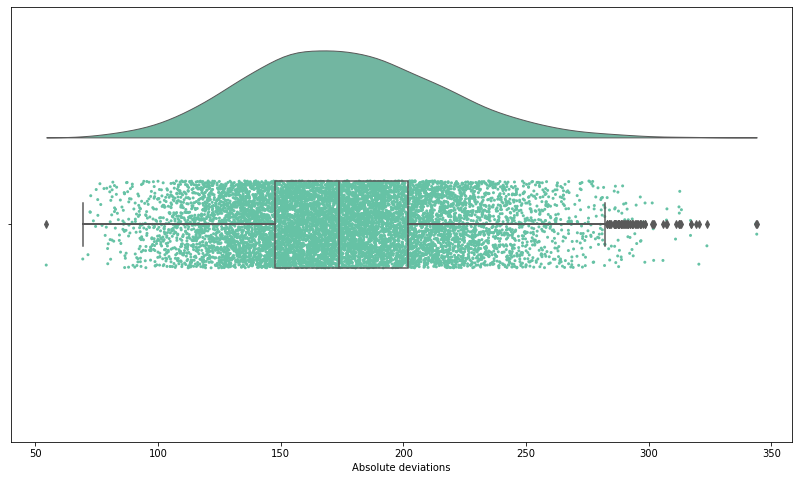

In [40]:
ax = pt.RainCloud( x = "Absolute deviations",
                  data = dff, 
                  width_viol = .4, 
                  width_box = .2,
                  orient = "v")

In [41]:
dff['M'] = dff.index
dff

,Absolute deviations,M
0,54.49,0
1,69.38,1
2,71.51,2
3,72.32,3
4,72.45,4
...,...,...
9995,319.41,9995
9996,320.47,9996
9997,323.75,9997
9998,343.59,9998


The key word in the previous sentence is “well-mixed.” In fact, the tumbler was anything but well-mixed. When the tumbler was filled, January capsules were placed in first, followed by February, and so on. Evidently, the mixing process did a poor job of shuffling the capsules around, leaving the capsules in the tumbler striated like a layer cake.

## DID THE GOVERNMENT FIX THE PROBLEM?

 · After the 1969 draft, the U.S. continued to hold this annual lottery until 1972. The government introduced some improvements to make the draft fairer: basically, better mixing!

· Let's take a look on the correlation between the month and the lottery number. To do this, we make a linear regression.

In [42]:
draft_70 = df.drop(['N69', 'N71', 'N72'], axis = 1)
draft_70

,M,D,N70
0,1,1,133
1,1,2,195
2,1,3,336
3,1,4,99
4,1,5,33
...,...,...,...
361,12,27,239
362,12,28,128
363,12,29,145
364,12,30,192


In [43]:
##remove 29 february (the draft was in 1970, but for 1971 year)

In [44]:
draft_70 = draft_70.drop(labels=59, axis =0)   #remove 29 february
draft_70 = draft_70.rename(columns={'M': 'Month', 'D': 'Day', 'N70': 'Lottery number'})

In [45]:
draft_70['Day of year'] = draft_70.index + 1
draft_70["Month name"] = draft_70["Month"]

In [46]:
draft_70.dtypes

Month              int64
Day                int64
Lottery number    object
Day of year        int64
Month name         int64
dtype: object

In [47]:
draft_70["Lottery number"] = pd.to_numeric(draft_70["Lottery number"])
draft_70["Month name"] = draft_70["Month name"].apply(str)
draft_70["Month name"].replace({"1":"January", "2":"February", "3":"March", "4":"April", "5":"May", "6":"June", "7":"July", "8":"August", "9":"September", "10":"October", "11":"November", "12":"December"})

0       January
1       January
2       January
3       January
4       January
         ...   
361    December
362    December
363    December
364    December
365    December
Name: Month name, Length: 365, dtype: object

In [48]:
draft_70["Recluted"] = np.where(draft_70["Lottery number"] < 195, True, False)
draft_70.groupby("Month")["Recluted"].value_counts()

Month  Recluted
1      True        24
       False        7
2      False       16
       True        12
3      True        16
       False       15
4      True        16
       False       14
5      True        16
       False       15
6      False       16
       True        14
7      True        18
       False       13
8      False       17
       True        14
9      False       19
       True        11
10     True        19
       False       12
11     True        17
       False       13
12     True        17
       False       14
Name: Recluted, dtype: int64

In [50]:
months_70 = draft_70.groupby('Month')[['Lottery number']].mean().round(2)
months_70 = months_70.rename(columns={'Lottery number': 'Average lottery number'})
months_70["Month_name"] = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
months_70["Number of selected days"] = [24,12,16,16,16,14,18,14,11,19,17,17]
months_70

,Average lottery number,Month_name,Number of selected days
Month,,,
1,151.84,January,24
2,198.89,February,12
3,179.77,March,16
4,182.17,April,16
5,183.52,May,16
6,194.57,June,14
7,183.58,July,18
8,194.35,August,14
9,209.87,September,11


In [52]:
#average ballots expected number= 183.5
months_70['deviation'] = months_70['Average lottery number'] - 183.5
months_70["abs_dev"] = abs(months_70["deviation"])
total_abs_dev = months_70["abs_dev"].sum()
total_abs_dev.round(2)

131.45

In [53]:
months_70["Mo"] = [1,2,3,4,5,6,7,8,9,10,11,12]
months_70["Average lottery number"].corr(months_70["Mo"]).round(2)

0.11

In [55]:
model = linear_model.LinearRegression()
y = months_70['Average lottery number']
X = months_70[['Mo']]

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
model.fit(X_train, y_train)

LinearRegression()

In [58]:
print("Coefficients:", model.coef_.round(2))
print("Intercept   :", model.intercept_.round(2))

print("Train score(R2) :", model.score(X_train, y_train).round(2))   #X

Coefficients: [0.5]
Intercept   : 186.9
Train score(R2) : 0.02


In [59]:
y_pred = model.predict(X_test)
y_pred.shape

(3,)

In [62]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
#Return the coefficient of determination of the prediction
#R2 = is the model good or not?
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 826.97
Variance score: -10.10


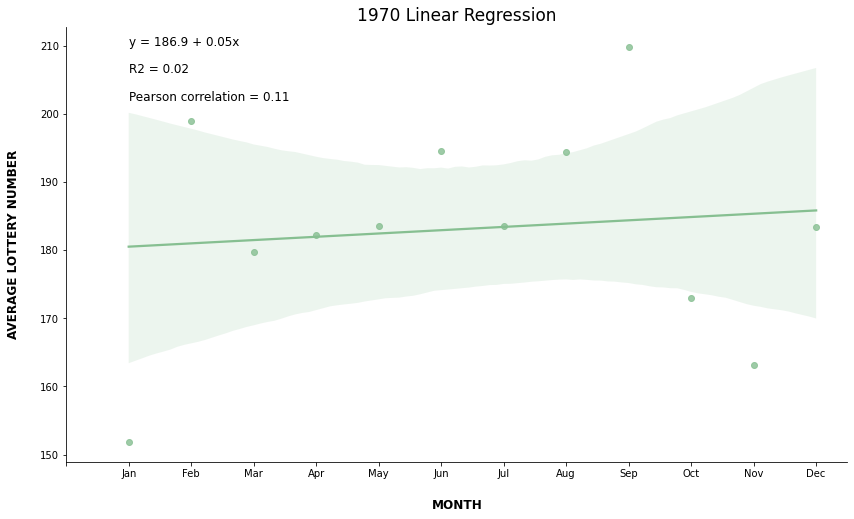

In [63]:
mm = sns.regplot(x="Mo", y="Average lottery number", data=months_70, color='#86bf91')
plt.xlim(1,12.5)
plt.xlabel("Month")
#plt.xticks(np.arange(min("Mo"), max("Mo"), 1.0))

plt.title("1970 Linear Regression", size=17)
mm.set_xticks(range(13))
mm.set_xticklabels(['','Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])


mm.set_xlabel("MONTH", labelpad=20, weight='bold', size=12)
mm.set_ylabel("AVERAGE LOTTERY NUMBER", labelpad=20, weight='bold', size=12)

mm.spines['right'].set_visible(False)   #remove border
mm.spines['top'].set_visible(False)


mm.text(1, 210, "y = 186.9 + 0.05x", size = 12)
mm.text(1, 206, "R2 = 0.02", size = 12)
mm.text(1, 202, "Pearson correlation = 0.11", size = 12)


plt.savefig('07_linear_regression_1970.jpg',dpi=100)

We can see that there is no linear regression!